# Credit Card Fraud Detection

**Author:** Rogerio Chaves

Description:</br>
<p align="justify">This project aim to detect fraud in credit card transaction. For this it use the <a href="https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023">Credit Card Fraud Detection Dataset 2023</a>. This dataset contains transactions made by European cardholders in the year of 2023. The data has been anonymized to protect the identities.</p></br>
Instances: 568.630 transactions</br>
Columns: </br>

- **id:** Unique identifier for each transaction;
- **V1 - V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc);
- **Amount:** the transaction amount;
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0).

## Preprocessing

### Import libraries

In [2]:
from IPython.display import display
from matplotlib.style import use
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

use('seaborn-v0_8')
%matplotlib inline

### Load the dataset.

In [3]:
df = pd.read_csv('data/creditcard_2023.csv')

In [4]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Change the name of last columns, from *class* to *target*, because class is a system word of python language.

In [6]:
columns_name = list(df.columns)
columns_name[-1] = 'target'
df.rename(columns=dict(zip(df.columns, columns_name)), inplace=True)

In [7]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Setting up the validation framework

Let's split the dataset in:

* 80% for training (cross validation);

* 20% for test.

In [8]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=1)

print(f'Training dataframe shape: {df_train.shape}')
print(f'Testing dataframe shape: {df_test.shape}')

Training dataframe shape: (454904, 31)
Testing dataframe shape: (113726, 31)


### Missing values.

In [9]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
target    0
dtype: int64

In [10]:
df_train = df_train.iloc[:,1:]

## Exploratoty data analysis

- Look at the target variable;
- Feature importance;
- Look at numerical variables.

### Distribuition of target values.

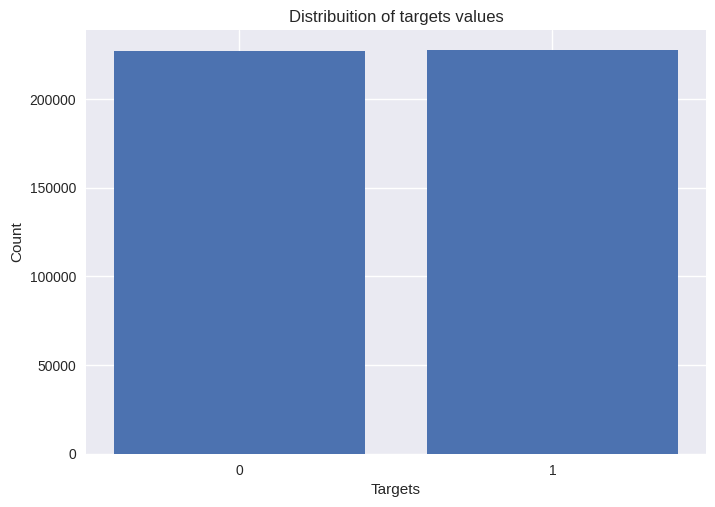

In [11]:
target_values, target_count = np.unique(df_train.target, return_counts=True)
plt.bar(target_values, target_count)
plt.xlabel('Targets')
plt.ylabel('Count')
plt.title('Distribuition of targets values')
plt.xticks([0, 1])
plt.show()

### Feature importance: correlation

In [12]:
corr = df_train[list(df_train.columns[df_train.columns != 'target'])].corrwith(df_train.target)
corr.sort_values(ascending=False, inplace=True)
corr

V4        0.735860
V11       0.724290
V2        0.491875
V19       0.243507
V27       0.214400
V20       0.179924
V8        0.143914
V21       0.109408
V28       0.102271
V26       0.070089
V25       0.061311
V22       0.013650
V23       0.009827
Amount    0.003266
V15      -0.037641
V13      -0.071618
V24      -0.129634
V5       -0.337642
V18      -0.410365
V6       -0.434857
V17      -0.476927
V7       -0.485417
V1       -0.505563
V16      -0.573710
V9       -0.585134
V10      -0.674334
V3       -0.682081
V12      -0.768255
V14      -0.804982
dtype: float64

In [13]:
relevant_columns = corr[abs(corr) >= 0.2]
relevant_columns = list(relevant_columns.index)
relevant_columns

['V4',
 'V11',
 'V2',
 'V19',
 'V27',
 'V5',
 'V18',
 'V6',
 'V17',
 'V7',
 'V1',
 'V16',
 'V9',
 'V10',
 'V3',
 'V12',
 'V14']

### Look at the distribution of the relevant features.

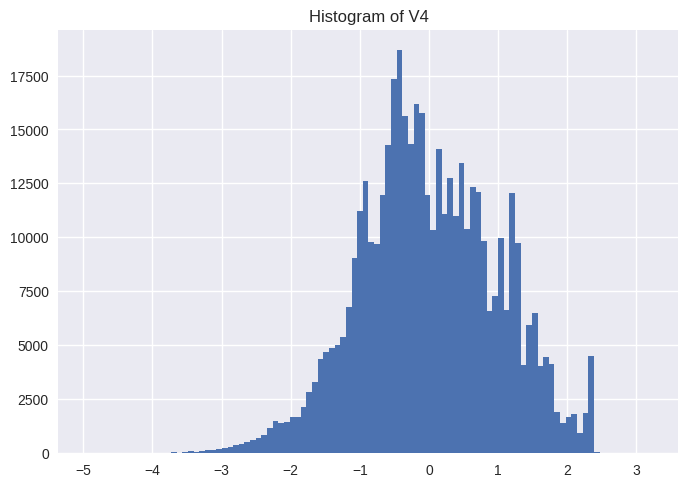

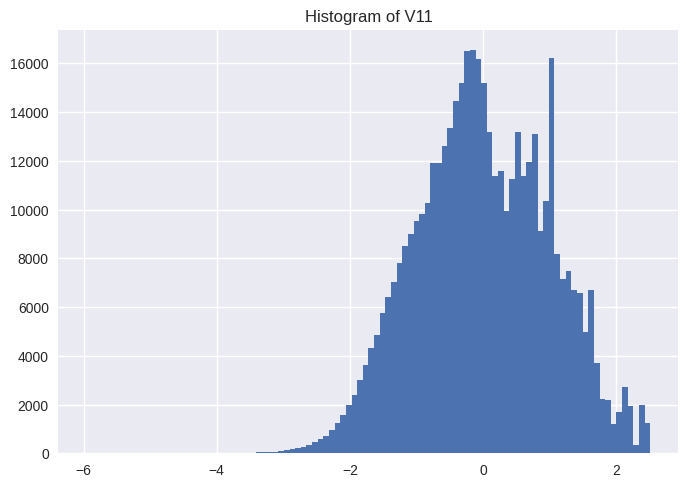

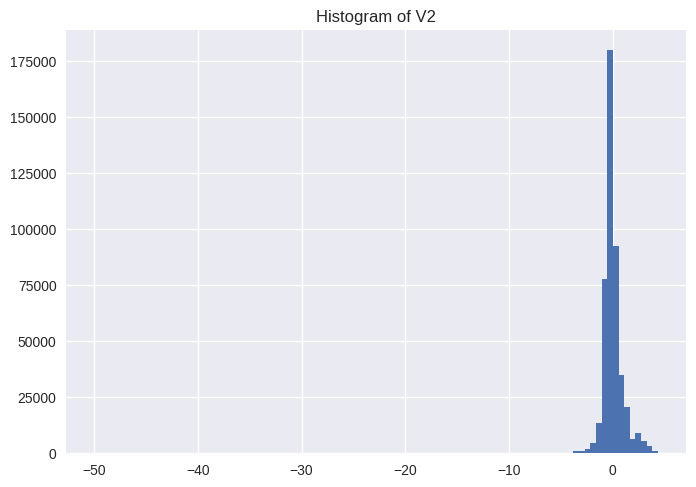

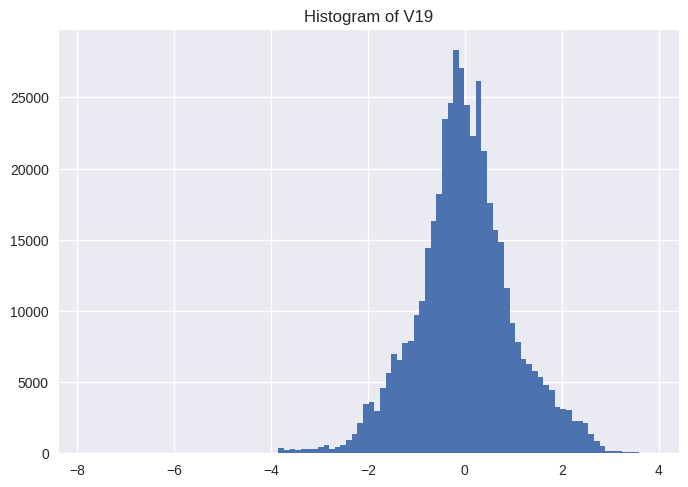

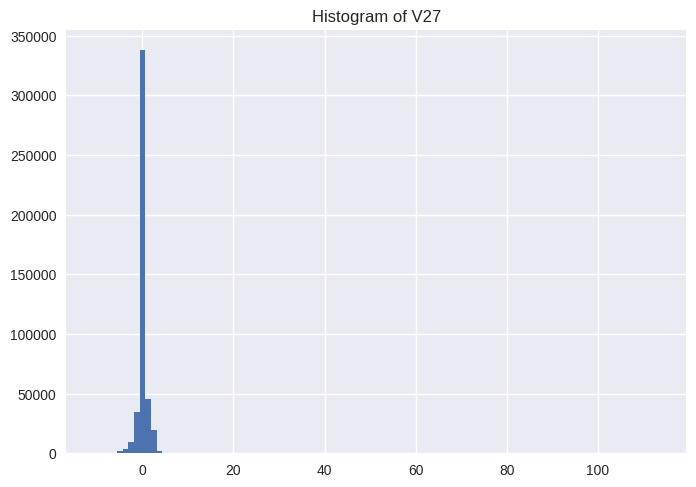

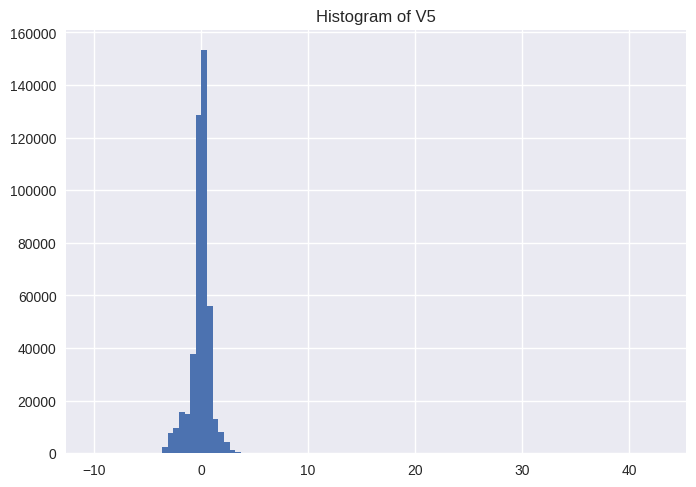

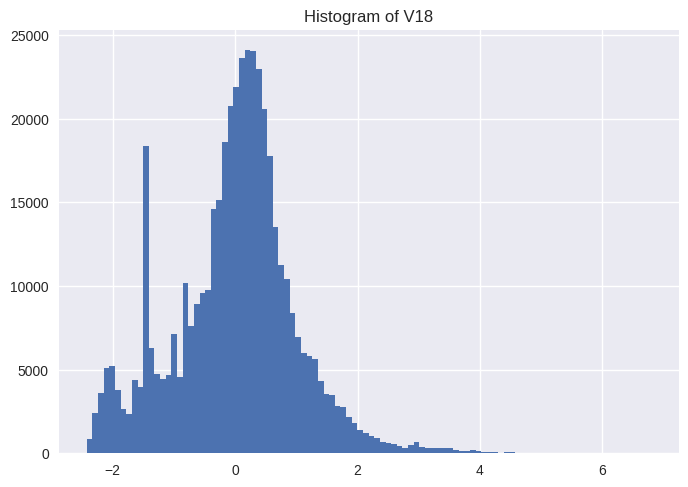

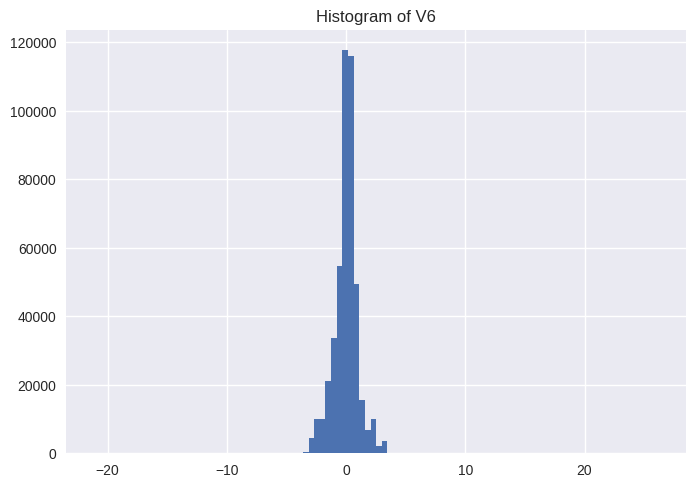

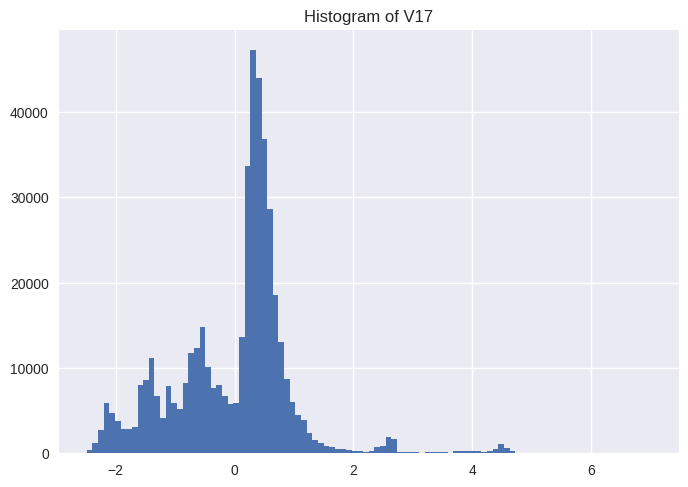

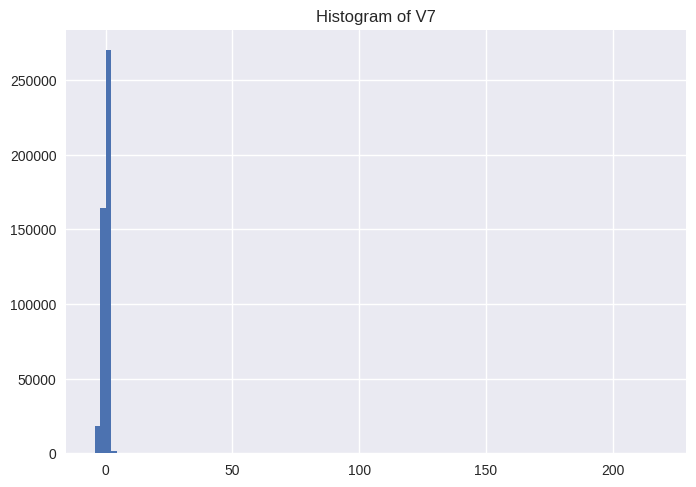

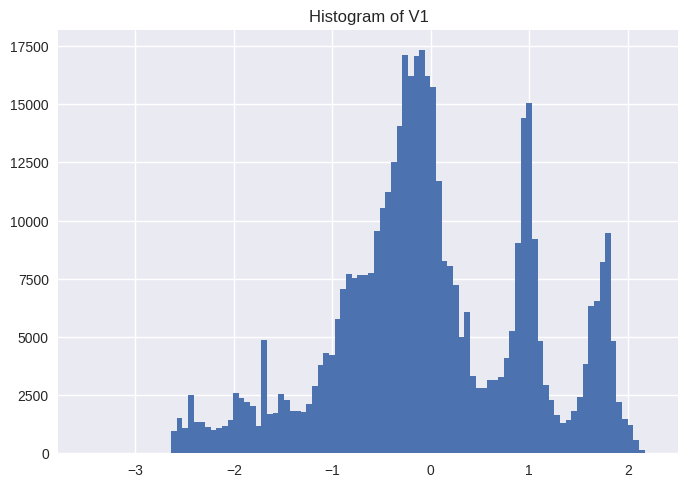

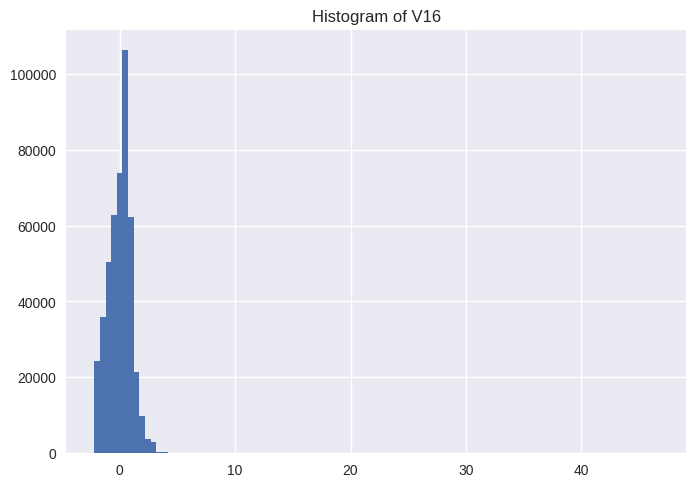

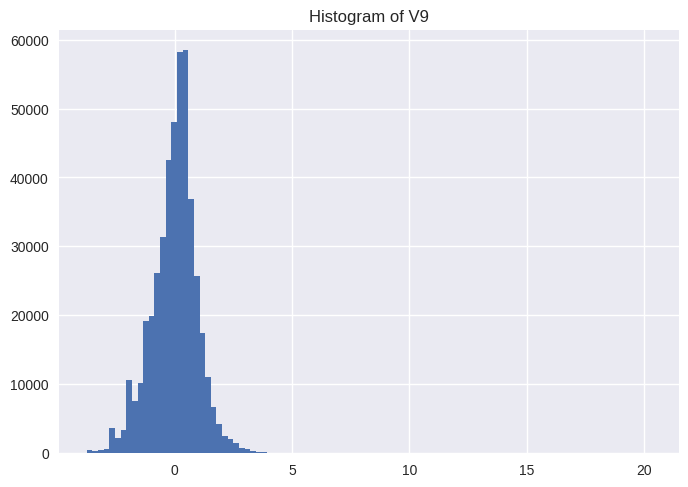

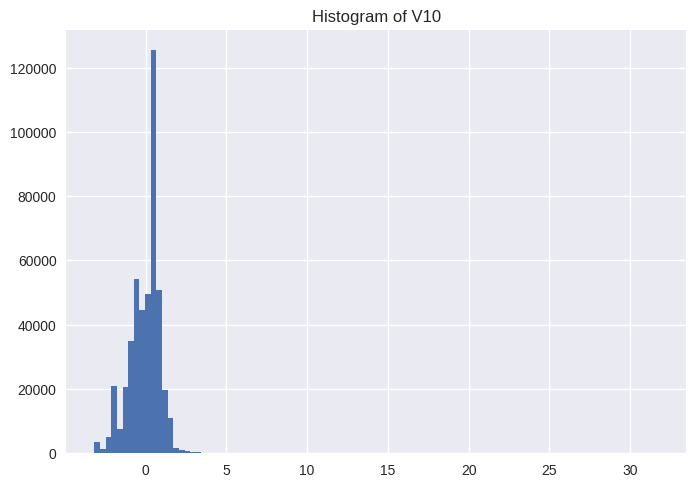

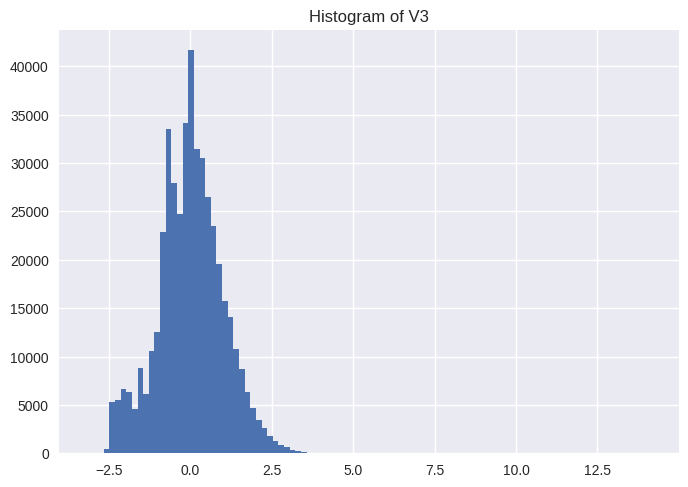

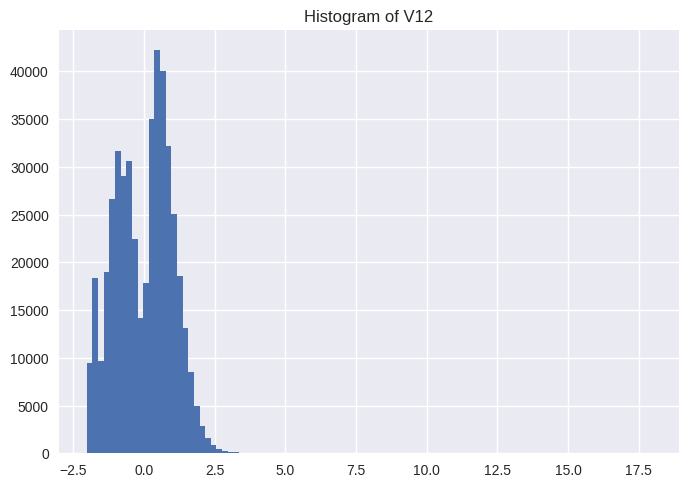

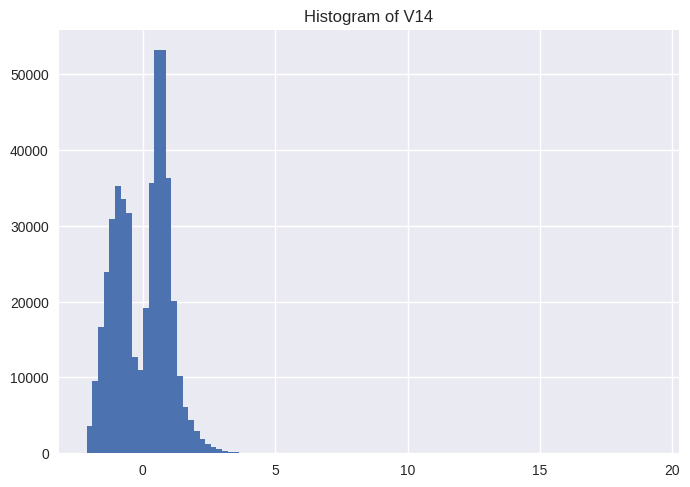

In [14]:
for attribute in relevant_columns:
    plt.figure()
    plt.hist(df_train[attribute], bins=100)
    plt.title(f'Histogram of {attribute}')
    plt.show()
    print()

Added target column to relevant columns list.

In [15]:
relevant_columns.append('target')

### Save the datasets.

Create a directory.

In [16]:
datasets_dir = 'data'

if not os.path.exists(datasets_dir):
    os.makedirs(datasets_dir)
    print('Datasets directory was created!')

Select relevant columns.

In [17]:
df_train = df_train[relevant_columns]
df_test = df_test[relevant_columns]

In [18]:
df_train.shape, df_test.shape

((454904, 18), (113726, 18))

In [19]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [20]:
df_train.to_csv(f'{datasets_dir}/train.csv', index=False)
df_test.to_csv(f'{datasets_dir}/test.csv', index=False)

## Split features and target.

In [21]:
y_train = df_train.target.values
y_test = df_test.target.values

In [22]:
del df_train['target']
del df_test['target']

In [23]:
X_train = df_train.values

## Model Selection.

### Decision Tree model

In [24]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [25]:
dt_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
dt_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

#### Best score

In [26]:
dt_model.best_score_

0.9978456989015863

#### Best parameters

In [27]:
dt_model.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

### Random Forest model

In [28]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 40, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5]
}

In [29]:
rf_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
rf_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 40, 100]})

#### Best score

In [30]:
rf_model.best_score_

0.9998241387193747

#### Best parameters

In [31]:
rf_model.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

## Save files

In [32]:
model_dir = 'model'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print('Directory was created!')

Directory was created!


Save relevant columns list.

In [33]:
model_info = f'{model_dir}/relevant_columns.bin'

with open(model_info, 'wb') as f:
    pickle.dump((relevant_columns), f)
    f.close()